<a href="https://colab.research.google.com/github/michelucci/aadl2-code/blob/master/chapter2/Polynomial_fitting_with_eager_execution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Polynomial fitting with eager execution

(C) 2019 Umberto Michelucci

umberto.michelucci@toelt.ai

www.toelt.ai

Idea inspired by https://goo.gl/m9y1C4

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')

import tensorflow.contrib.eager as tfe

from google.colab import files

tf.enable_eager_execution()

Now we need to generate some data 

In [0]:
x = np.arange(0, 5, 0.1)
y = x**3 - 4*x**2 - 2*x + 2
y_noise = y + np.random.normal(0, 1.5, size=(len(x),))

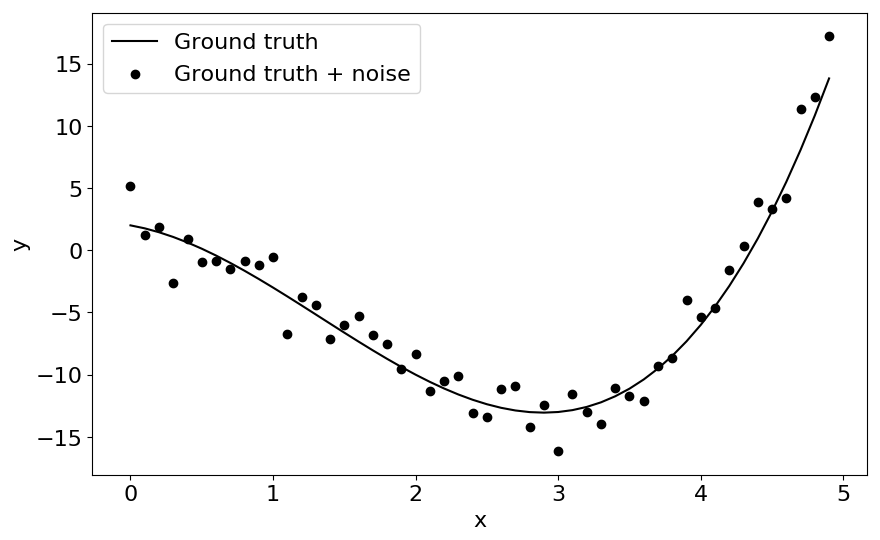

In [0]:
fig = plt.figure (figsize = (10,6))
plt.plot(x,y, label = "Ground truth", color = 'black')
plt.scatter(x, y_noise, label = "Ground truth + noise", color = 'black')
plt.legend(fontsize = 16, loc = 'upper left')
plt.xlabel ('x', fontsize = 16)
plt.ylabel ('y', fontsize = 16)
plt.tick_params(axis='both', which='major', labelsize=16)


# Save the file for publication
fig.savefig('ch2-michelucci-fig1.png', bbox_inches='tight', dpi = 300)
files.download('ch2-michelucci-fig1.png')

and let's define the loss function (remember we are doing regression)

In [0]:
def loss(model, x, y):
    err = model.f(x) - y
    return tf.reduce_mean(tf.square(err))

In [0]:
class PolyModel(object):
  def __init__(self):
    self.w = tfe.Variable(tf.random_normal([4])) # The 4 parameters
    
  def f(self, x):
    return self.w[0] * x ** 3 + self.w[1] * x ** 2 + self.w[2] * x + self.w[3]

In [0]:
model = PolyModel()
grad = tfe.implicit_gradients(loss)
optimizer = tf.train.AdamOptimizer()
iters = 20001
for i in range(iters):
  optimizer.apply_gradients(grad(model, x, y))
  if i % 2000 == 0:
        print("Iteration {}, loss: {}".format(i, loss(model, x, y).numpy()))

Iteration 0, loss: 984.4209594726562
Iteration 2000, loss: 19.174142837524414
Iteration 4000, loss: 9.046091079711914
Iteration 6000, loss: 3.500523567199707
Iteration 8000, loss: 1.4073338508605957
Iteration 10000, loss: 0.24355526268482208
Iteration 12000, loss: 0.008540071547031403
Iteration 14000, loss: 0.002185662044212222
Iteration 16000, loss: 0.0005249679088592529
Iteration 18000, loss: 1.0747632586571854e-05
Iteration 20000, loss: 1.273602112661365e-08


We can write the same code and save the loss function to check how is decreasing

In [0]:
model = PolyModel()
grad = tfe.implicit_gradients(loss)
optimizer = tf.train.AdamOptimizer()
loss_hist = []
iters = 20001
for i in range(iters):
  optimizer.apply_gradients(grad(model, x, y))
  loss_hist.append(loss(model, x, y).numpy())
  if i % 2000 == 0:
        print("Iteration {}, loss: {}".format(i, loss(model, x, y).numpy()))

Iteration 0, loss: 4412.55712890625
Iteration 2000, loss: 126.94115447998047
Iteration 4000, loss: 86.31401062011719
Iteration 6000, loss: 45.009552001953125
Iteration 8000, loss: 17.839040756225586
Iteration 10000, loss: 8.199403762817383
Iteration 12000, loss: 3.2841012477874756
Iteration 14000, loss: 0.8648725748062134
Iteration 16000, loss: 0.10123155266046524
Iteration 18000, loss: 0.023564498871564865
Iteration 20000, loss: 0.004939439240843058


Let's plot the loss function now

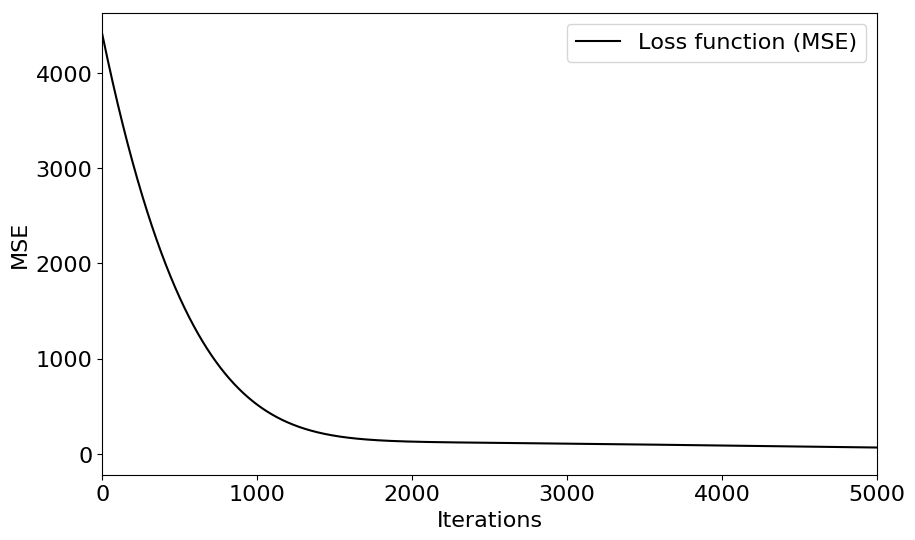

In [0]:
fig = plt.figure (figsize = (10,6))
plt.plot(np.arange(0, iters),loss_hist, label = "Loss function (MSE)", color = 'black')

plt.legend(fontsize = 16, loc = 'upper right')
plt.xlabel ('Iterations', fontsize = 16)
plt.ylabel ('MSE', fontsize = 16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.xlim(0, 5000)

# Save the file for publication
fig.savefig('ch2-michelucci-fig2.png', bbox_inches='tight', dpi = 300)
files.download('ch2-michelucci-fig2.png')

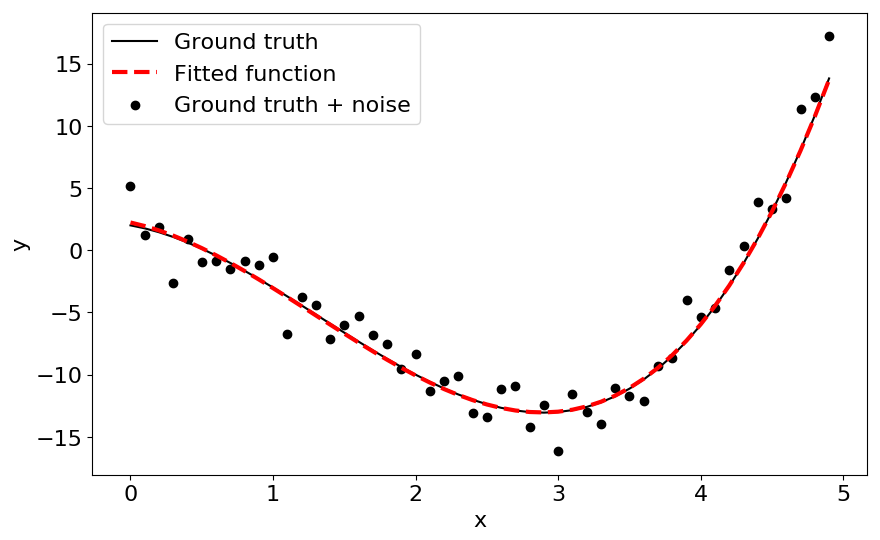

In [0]:
fig = plt.figure (figsize = (10,6))
plt.plot(x,y, label = "Ground truth", color = 'black')
plt.scatter(x, y_noise, label = "Ground truth + noise", color = 'black')
plt.plot(x, model.f(x).numpy(), color = 'red', ls = '--', lw = 3, 
         label = 'Fitted function')
plt.legend(fontsize = 16, loc = 'upper left')
plt.xlabel ('x', fontsize = 16)
plt.ylabel ('y', fontsize = 16)
plt.tick_params(axis='both', which='major', labelsize=16)


# Save the file for publication
fig.savefig('ch2-michelucci-fig3.png', bbox_inches='tight', dpi = 300)
files.download('ch2-michelucci-fig3.png')